## Can Twitter help predict stock prices?

# Import all libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import io
from google.colab import files

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [2]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [3]:
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import math
#import xlsxwriter
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt

# Analytical Dataset

In [4]:
uploaded = files.upload()

Saving openai_day23_tweets.csv to openai_day23_tweets.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['openai_day23_tweets.csv']))
df.columns

Index(['Unnamed: 0', 'tweet_id', 'tweet_created', 'tweet_extracted', 'text',
       'lang', 'user_id', 'user_name', 'user_username', 'user_location',
       'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified', 'source',
       'retweet_count', 'like_count', 'reply_count', 'impression_count'],
      dtype='object')

Filter for required columns

In [6]:
df = df[['tweet_created','text','user_followers_count']]
df.head(2)

,tweet_created,text,user_followers_count
0,2023-05-30 00:49:58+00:00,@rowancheung @dr_cintas I genuinely struggle t...,2662
1,2023-05-30 00:50:26+00:00,@HeroAltman @LangChainAI tried using chatgpt t...,2314


Create a function using VADER library to extract dentiment scores

In [7]:
def sentimentScore(Tweet):
    analyzer = SentimentIntensityAnalyzer()
    score_values = []
    for tweet in df['text']:
        vs1 = analyzer.polarity_scores(tweet)
        print("Score: " + str(vs1))
        score_values.append(vs1)
    return score_values

In [8]:
sentiment_scores = pd.DataFrame(sentimentScore(df['text']))

Score: {'neg': 0.128, 'neu': 0.726, 'pos': 0.145, 'compound': 0.0772}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.146, 'neu': 0.714, 'pos': 0.141, 'compound': 0.2103}
Score: {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}
Score: {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.6239}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.4939}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.04, 'neu': 0.824, 'pos': 0.136, 'compound': 0.4863}
Score: {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.5627}
Score: {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.8671}
Score: {'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.4767}
Score: {'neg': 0.

In [9]:
raw_ads = pd.merge(df, sentiment_scores, left_index=True, right_index=True)
raw_ads = raw_ads[(raw_ads['tweet_created'] >= '2023-05-28') & (raw_ads['tweet_created'] <= '2023-06-19')]

In [10]:
raw_ads

,tweet_created,text,user_followers_count,neg,neu,pos,compound
0,2023-05-30 00:49:58+00:00,@rowancheung @dr_cintas I genuinely struggle t...,2662,0.128,0.726,0.145,0.0772
1,2023-05-30 00:50:26+00:00,@HeroAltman @LangChainAI tried using chatgpt t...,2314,0.000,1.000,0.000,0.0000
2,2023-05-30 00:51:01+00:00,👀 0x7052..e242 ↘️ fumbled ↘️ WOW #2141\nhttps:...,0,0.146,0.714,0.141,0.2103
3,2023-05-30 00:52:33+00:00,Interesting\n\nhttps://t.co/CAonmfKOvR https:/...,149,0.000,0.426,0.574,0.4019
4,2023-05-30 00:55:12+00:00,4/4 Special call out to @josephpollack for bei...,32587,0.000,0.805,0.195,0.6239
...,...,...,...,...,...,...,...
1895,2023-06-18 22:53:45+00:00,"@MyMapdotAI Two months ago, I suffered a super...",350,0.128,0.747,0.126,-0.0258
1896,2023-06-18 23:25:43+00:00,Google and OpenAI are aware of this and they’r...,731,0.130,0.870,0.000,-0.7269
1897,2023-06-18 23:37:01+00:00,"📢 New post: ""Interesting Stuff - Week 24, 202...",7415,0.000,0.927,0.073,0.4574
1898,2023-06-18 23:46:36+00:00,@EvidenceOpen Is the company related to OpenAI...,4948,0.000,0.830,0.170,0.7882


Change the date column to date time format

In [11]:
raw_ads['datetime'] = pd.to_datetime(raw_ads['tweet_created'])

raw_ads['date'] = raw_ads['datetime'].dt.date
raw_ads['time'] = raw_ads['datetime'].dt.time

In [12]:
raw_ads.head()

,tweet_created,text,user_followers_count,neg,neu,pos,compound,datetime,date,time
0,2023-05-30 00:49:58+00:00,@rowancheung @dr_cintas I genuinely struggle t...,2662,0.128,0.726,0.145,0.0772,2023-05-30 00:49:58+00:00,2023-05-30,00:49:58
1,2023-05-30 00:50:26+00:00,@HeroAltman @LangChainAI tried using chatgpt t...,2314,0.000,1.000,0.000,0.0000,2023-05-30 00:50:26+00:00,2023-05-30,00:50:26
2,2023-05-30 00:51:01+00:00,👀 0x7052..e242 ↘️ fumbled ↘️ WOW #2141\nhttps:...,0,0.146,0.714,0.141,0.2103,2023-05-30 00:51:01+00:00,2023-05-30,00:51:01
3,2023-05-30 00:52:33+00:00,Interesting\n\nhttps://t.co/CAonmfKOvR https:/...,149,0.000,0.426,0.574,0.4019,2023-05-30 00:52:33+00:00,2023-05-30,00:52:33
4,2023-05-30 00:55:12+00:00,4/4 Special call out to @josephpollack for bei...,32587,0.000,0.805,0.195,0.6239,2023-05-30 00:55:12+00:00,2023-05-30,00:55:12


Filter for non-neutral tweets

In [13]:
raw_ads_2 = raw_ads[(raw_ads['compound'] !=0)]

In [14]:
len(raw_ads_2)

1402

To add the influence power of the tweeter to the tweet sentiment, we multiply the number of followers with the compound value to obtain sentiment_score.

Note - Filter for tweeters having >0 followers

In [15]:
raw_ads_3 = raw_ads_2[raw_ads_2['user_followers_count'].isnull()==False]
raw_ads_3

,tweet_created,text,user_followers_count,neg,neu,pos,compound,datetime,date,time
0,2023-05-30 00:49:58+00:00,@rowancheung @dr_cintas I genuinely struggle t...,2662,0.128,0.726,0.145,0.0772,2023-05-30 00:49:58+00:00,2023-05-30,00:49:58
2,2023-05-30 00:51:01+00:00,👀 0x7052..e242 ↘️ fumbled ↘️ WOW #2141\nhttps:...,0,0.146,0.714,0.141,0.2103,2023-05-30 00:51:01+00:00,2023-05-30,00:51:01
3,2023-05-30 00:52:33+00:00,Interesting\n\nhttps://t.co/CAonmfKOvR https:/...,149,0.000,0.426,0.574,0.4019,2023-05-30 00:52:33+00:00,2023-05-30,00:52:33
4,2023-05-30 00:55:12+00:00,4/4 Special call out to @josephpollack for bei...,32587,0.000,0.805,0.195,0.6239,2023-05-30 00:55:12+00:00,2023-05-30,00:55:12
7,2023-05-30 02:54:44+00:00,@mbertulli ChatGPT could probably do that for ...,14453,0.000,0.789,0.211,0.4939,2023-05-30 02:54:44+00:00,2023-05-30,02:54:44
...,...,...,...,...,...,...,...,...,...,...
1895,2023-06-18 22:53:45+00:00,"@MyMapdotAI Two months ago, I suffered a super...",350,0.128,0.747,0.126,-0.0258,2023-06-18 22:53:45+00:00,2023-06-18,22:53:45
1896,2023-06-18 23:25:43+00:00,Google and OpenAI are aware of this and they’r...,731,0.130,0.870,0.000,-0.7269,2023-06-18 23:25:43+00:00,2023-06-18,23:25:43
1897,2023-06-18 23:37:01+00:00,"📢 New post: ""Interesting Stuff - Week 24, 202...",7415,0.000,0.927,0.073,0.4574,2023-06-18 23:37:01+00:00,2023-06-18,23:37:01
1898,2023-06-18 23:46:36+00:00,@EvidenceOpen Is the company related to OpenAI...,4948,0.000,0.830,0.170,0.7882,2023-06-18 23:46:36+00:00,2023-06-18,23:46:36


In [16]:
raw_ads_3['sentiment_score'] = raw_ads_3['compound']*raw_ads_3['user_followers_count']

In [17]:
raw_ads_3.reset_index()
raw_ads_3

,tweet_created,text,user_followers_count,neg,neu,pos,compound,datetime,date,time,sentiment_score
0,2023-05-30 00:49:58+00:00,@rowancheung @dr_cintas I genuinely struggle t...,2662,0.128,0.726,0.145,0.0772,2023-05-30 00:49:58+00:00,2023-05-30,00:49:58,205.5064
2,2023-05-30 00:51:01+00:00,👀 0x7052..e242 ↘️ fumbled ↘️ WOW #2141\nhttps:...,0,0.146,0.714,0.141,0.2103,2023-05-30 00:51:01+00:00,2023-05-30,00:51:01,0.0000
3,2023-05-30 00:52:33+00:00,Interesting\n\nhttps://t.co/CAonmfKOvR https:/...,149,0.000,0.426,0.574,0.4019,2023-05-30 00:52:33+00:00,2023-05-30,00:52:33,59.8831
4,2023-05-30 00:55:12+00:00,4/4 Special call out to @josephpollack for bei...,32587,0.000,0.805,0.195,0.6239,2023-05-30 00:55:12+00:00,2023-05-30,00:55:12,20331.0293
7,2023-05-30 02:54:44+00:00,@mbertulli ChatGPT could probably do that for ...,14453,0.000,0.789,0.211,0.4939,2023-05-30 02:54:44+00:00,2023-05-30,02:54:44,7138.3367
...,...,...,...,...,...,...,...,...,...,...,...
1895,2023-06-18 22:53:45+00:00,"@MyMapdotAI Two months ago, I suffered a super...",350,0.128,0.747,0.126,-0.0258,2023-06-18 22:53:45+00:00,2023-06-18,22:53:45,-9.0300
1896,2023-06-18 23:25:43+00:00,Google and OpenAI are aware of this and they’r...,731,0.130,0.870,0.000,-0.7269,2023-06-18 23:25:43+00:00,2023-06-18,23:25:43,-531.3639
1897,2023-06-18 23:37:01+00:00,"📢 New post: ""Interesting Stuff - Week 24, 202...",7415,0.000,0.927,0.073,0.4574,2023-06-18 23:37:01+00:00,2023-06-18,23:37:01,3391.6210
1898,2023-06-18 23:46:36+00:00,@EvidenceOpen Is the company related to OpenAI...,4948,0.000,0.830,0.170,0.7882,2023-06-18 23:46:36+00:00,2023-06-18,23:46:36,3900.0136


# Preparing the dataset for machine learning

Take daily average of values to prepare the timeseries data

In [18]:
raw_ads_4=(raw_ads_3.groupby(raw_ads_3.date).mean().reset_index(drop=False))
raw_ads_4

<ipython-input-18-c84e53ee2915>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_ads_4=(raw_ads_3.groupby(raw_ads_3.date).mean().reset_index(drop=False))


,date,user_followers_count,neg,neu,pos,compound,sentiment_score
0,2023-05-30,10615.305556,0.046097,0.795611,0.158208,0.342221,5288.542950
1,2023-05-31,14245.802817,0.053451,0.817620,0.128972,0.254487,3652.498834
2,2023-06-01,20192.666667,0.074185,0.780333,0.145481,0.212984,1629.757286
3,2023-06-02,142679.246914,0.079395,0.785901,0.134765,0.259656,59475.533072
4,2023-06-03,5184.205882,0.056632,0.791353,0.152044,0.332519,1969.334774
5,2023-06-04,21299.835616,0.043370,0.805562,0.151014,0.328323,11168.731767
6,2023-06-05,50125.025641,0.062564,0.809179,0.128244,0.231937,20117.275226
7,2023-06-07,153660.023529,0.056435,0.775576,0.168012,0.280304,-3544.594644
8,2023-06-08,24960.881579,0.064355,0.789276,0.146474,0.302091,14097.981239
9,2023-06-09,249280.051282,0.055154,0.777295,0.167564,0.317613,231688.819469


In [19]:
!pip install alpha_vantage

In [20]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [21]:
api_key = '7MWTQAGB36ATLUMY'
ts = TimeSeries(key=api_key)

In [22]:
symbol = 'MSFT'
data, metadata = ts.get_daily_adjusted(symbol=symbol, outputsize='compact')

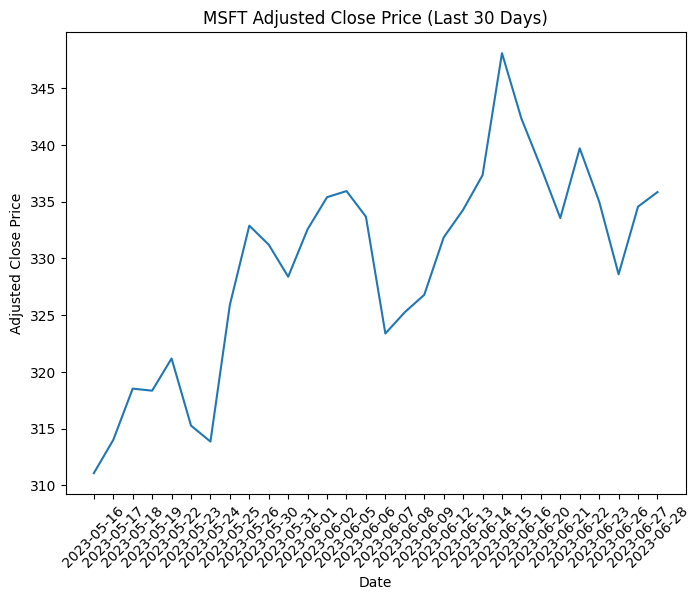

In [23]:
close_prices = []
dates = []

# Extract the adjusted close price and date for the last 30 days
for date in sorted(data.keys(), reverse=True)[:30]:
    close_price = float(data[date]['5. adjusted close'])
    close_prices.append(close_price)
    dates.append(date)

# Reverse the lists to maintain the correct order
close_prices = close_prices[::-1]
dates = dates[::-1]
plt.figure(figsize=(8, 6))
plt.plot(dates, close_prices)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'{symbol} Adjusted Close Price (Last 30 Days)')
plt.xticks(rotation=45)
plt.show()

In [24]:
df = pd.DataFrame(data).T
df.reset_index(inplace=True)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Dividend', 'Split Coefficient']

print(df)

          Date     Open     High     Low   Close    Adjusted Close    Volume  \
0   2023-06-28   334.66   337.98  333.81  335.85            335.85  20259523   
1   2023-06-27   331.86   336.15   329.3  334.57            334.57  24354110   
2   2023-06-26   333.72   336.11  328.49   328.6             328.6  21520582   
3   2023-06-23   334.36   337.96  333.45  335.02            335.02  23146901   
4   2023-06-22   334.12   340.12  333.34  339.71            339.71  23556764   
..         ...      ...      ...     ...     ...               ...       ...   
95  2023-02-09    273.8   273.98   262.8  263.62  262.387839705474  42375102   
96  2023-02-08    273.2   276.76  266.21  266.73  265.483303560584  54686049   
97  2023-02-07   260.53  268.775  260.08  267.56  266.309424139278  50841365   
98  2023-02-06   257.44    258.3  254.78  256.77  255.569856616245  22517997   
99  2023-02-03  259.542    264.2   257.1  258.35  257.142471693761  29077256   

   Dividend Split Coefficient  
0    0.

In [25]:
df.to_csv("stock_data.csv")


In [26]:
df2 = pd.read_csv('stock_data.csv')
df2

,Unnamed: 0,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend,Split Coefficient
0,0,2023-06-28,334.660,337.980,333.81,335.85,335.850000,20259523,0.0,1.0
1,1,2023-06-27,331.860,336.150,329.30,334.57,334.570000,24354110,0.0,1.0
2,2,2023-06-26,333.720,336.110,328.49,328.60,328.600000,21520582,0.0,1.0
3,3,2023-06-23,334.360,337.960,333.45,335.02,335.020000,23146901,0.0,1.0
4,4,2023-06-22,334.120,340.120,333.34,339.71,339.710000,23556764,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,95,2023-02-09,273.800,273.980,262.80,263.62,262.387840,42375102,0.0,1.0
96,96,2023-02-08,273.200,276.760,266.21,266.73,265.483304,54686049,0.0,1.0
97,97,2023-02-07,260.530,268.775,260.08,267.56,266.309424,50841365,0.0,1.0
98,98,2023-02-06,257.440,258.300,254.78,256.77,255.569857,22517997,0.0,1.0


In [27]:
df3 = df2.sort_values('Date', ascending=True)
df3

,Unnamed: 0,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend,Split Coefficient
99,99,2023-02-03,259.542,264.200,257.10,258.35,257.142472,29077256,0.0,1.0
98,98,2023-02-06,257.440,258.300,254.78,256.77,255.569857,22517997,0.0,1.0
97,97,2023-02-07,260.530,268.775,260.08,267.56,266.309424,50841365,0.0,1.0
96,96,2023-02-08,273.200,276.760,266.21,266.73,265.483304,54686049,0.0,1.0
95,95,2023-02-09,273.800,273.980,262.80,263.62,262.387840,42375102,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4,4,2023-06-22,334.120,340.120,333.34,339.71,339.710000,23556764,0.0,1.0
3,3,2023-06-23,334.360,337.960,333.45,335.02,335.020000,23146901,0.0,1.0
2,2,2023-06-26,333.720,336.110,328.49,328.60,328.600000,21520582,0.0,1.0
1,1,2023-06-27,331.860,336.150,329.30,334.57,334.570000,24354110,0.0,1.0


In [28]:
df3['datetime'] = pd.to_datetime(df3['Date'])
df3['date'] = df3['datetime'].dt.date
df3

,Unnamed: 0,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend,Split Coefficient,datetime,date
99,99,2023-02-03,259.542,264.200,257.10,258.35,257.142472,29077256,0.0,1.0,2023-02-03,2023-02-03
98,98,2023-02-06,257.440,258.300,254.78,256.77,255.569857,22517997,0.0,1.0,2023-02-06,2023-02-06
97,97,2023-02-07,260.530,268.775,260.08,267.56,266.309424,50841365,0.0,1.0,2023-02-07,2023-02-07
96,96,2023-02-08,273.200,276.760,266.21,266.73,265.483304,54686049,0.0,1.0,2023-02-08,2023-02-08
95,95,2023-02-09,273.800,273.980,262.80,263.62,262.387840,42375102,0.0,1.0,2023-02-09,2023-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2023-06-22,334.120,340.120,333.34,339.71,339.710000,23556764,0.0,1.0,2023-06-22,2023-06-22
3,3,2023-06-23,334.360,337.960,333.45,335.02,335.020000,23146901,0.0,1.0,2023-06-23,2023-06-23
2,2,2023-06-26,333.720,336.110,328.49,328.60,328.600000,21520582,0.0,1.0,2023-06-26,2023-06-26
1,1,2023-06-27,331.860,336.150,329.30,334.57,334.570000,24354110,0.0,1.0,2023-06-27,2023-06-27


In [29]:
stock = df3[(df3['datetime'] >= '2023-05-30') & (df3['datetime'] <= '2023-06-19')]
stock

,Unnamed: 0,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend,Split Coefficient,datetime,date
20,20,2023-05-30,335.230,335.7400,330.5200,331.21,331.21,29503070,0.0,1.0,2023-05-30,2023-05-30
19,19,2023-05-31,332.290,335.9400,327.3300,328.39,328.39,45546858,0.0,1.0,2023-05-31,2023-05-31
18,18,2023-06-01,325.930,333.5300,324.7200,332.58,332.58,26773851,0.0,1.0,2023-06-01,2023-06-01
17,17,2023-06-02,334.247,337.5000,332.5500,335.40,335.40,25873769,0.0,1.0,2023-06-02,2023-06-02
16,16,2023-06-05,335.220,338.5599,334.6601,335.94,335.94,21307053,0.0,1.0,2023-06-05,2023-06-05
15,15,2023-06-06,335.330,335.3700,332.1700,333.68,333.68,20396223,0.0,1.0,2023-06-06,2023-06-06
14,14,2023-06-07,331.650,334.4900,322.5000,323.38,323.38,40717129,0.0,1.0,2023-06-07,2023-06-07
13,13,2023-06-08,323.935,326.6400,323.3500,325.26,325.26,23277708,0.0,1.0,2023-06-08,2023-06-08
12,12,2023-06-09,324.990,329.9900,324.4100,326.79,326.79,22528950,0.0,1.0,2023-06-09,2023-06-09
11,11,2023-06-12,328.580,332.0999,325.1600,331.85,331.85,24306753,0.0,1.0,2023-06-12,2023-06-12


In [30]:
stock

,Unnamed: 0,Date,Open,High,Low,Close,Adjusted Close,Volume,Dividend,Split Coefficient,datetime,date
20,20,2023-05-30,335.230,335.7400,330.5200,331.21,331.21,29503070,0.0,1.0,2023-05-30,2023-05-30
19,19,2023-05-31,332.290,335.9400,327.3300,328.39,328.39,45546858,0.0,1.0,2023-05-31,2023-05-31
18,18,2023-06-01,325.930,333.5300,324.7200,332.58,332.58,26773851,0.0,1.0,2023-06-01,2023-06-01
17,17,2023-06-02,334.247,337.5000,332.5500,335.40,335.40,25873769,0.0,1.0,2023-06-02,2023-06-02
16,16,2023-06-05,335.220,338.5599,334.6601,335.94,335.94,21307053,0.0,1.0,2023-06-05,2023-06-05
15,15,2023-06-06,335.330,335.3700,332.1700,333.68,333.68,20396223,0.0,1.0,2023-06-06,2023-06-06
14,14,2023-06-07,331.650,334.4900,322.5000,323.38,323.38,40717129,0.0,1.0,2023-06-07,2023-06-07
13,13,2023-06-08,323.935,326.6400,323.3500,325.26,325.26,23277708,0.0,1.0,2023-06-08,2023-06-08
12,12,2023-06-09,324.990,329.9900,324.4100,326.79,326.79,22528950,0.0,1.0,2023-06-09,2023-06-09
11,11,2023-06-12,328.580,332.0999,325.1600,331.85,331.85,24306753,0.0,1.0,2023-06-12,2023-06-12


In [31]:
df_sorted = stock.sort_values('Date', ascending=True)

In [32]:
stock = stock[['Date','Open','High','Low','Close','Volume','Adjusted Close']]
stock

,Date,Open,High,Low,Close,Volume,Adjusted Close
20,2023-05-30,335.230,335.7400,330.5200,331.21,29503070,331.21
19,2023-05-31,332.290,335.9400,327.3300,328.39,45546858,328.39
18,2023-06-01,325.930,333.5300,324.7200,332.58,26773851,332.58
17,2023-06-02,334.247,337.5000,332.5500,335.40,25873769,335.40
16,2023-06-05,335.220,338.5599,334.6601,335.94,21307053,335.94
15,2023-06-06,335.330,335.3700,332.1700,333.68,20396223,333.68
14,2023-06-07,331.650,334.4900,322.5000,323.38,40717129,323.38
13,2023-06-08,323.935,326.6400,323.3500,325.26,23277708,325.26
12,2023-06-09,324.990,329.9900,324.4100,326.79,22528950,326.79
11,2023-06-12,328.580,332.0999,325.1600,331.85,24306753,331.85


In [ ]:
stock_data.columns = ['High','Low','Open','Close','Volume_of_stock','Adj_Close_stock']

NameError: ignored

Daily change in stock calculation and standardizing the value

In [33]:
stock['stock_val_change'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100.0
stock

<ipython-input-33-5ba12a4f19e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['stock_val_change'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100.0


,Date,Open,High,Low,Close,Volume,Adjusted Close,stock_val_change
20,2023-05-30,335.230,335.7400,330.5200,331.21,29503070,331.21,-1.199177
19,2023-05-31,332.290,335.9400,327.3300,328.39,45546858,328.39,-1.173674
18,2023-06-01,325.930,333.5300,324.7200,332.58,26773851,332.58,2.040315
17,2023-06-02,334.247,337.5000,332.5500,335.40,25873769,335.40,0.344954
16,2023-06-05,335.220,338.5599,334.6601,335.94,21307053,335.94,0.214784
15,2023-06-06,335.330,335.3700,332.1700,333.68,20396223,333.68,-0.492053
14,2023-06-07,331.650,334.4900,322.5000,323.38,40717129,323.38,-2.493593
13,2023-06-08,323.935,326.6400,323.3500,325.26,23277708,325.26,0.409033
12,2023-06-09,324.990,329.9900,324.4100,326.79,22528950,326.79,0.553863
11,2023-06-12,328.580,332.0999,325.1600,331.85,24306753,331.85,0.995191


In [34]:
scaler = StandardScaler()
stock['stock_val_change_scaled'] = scaler.fit_transform(stock[['stock_val_change']])
stock

<ipython-input-34-67c2acff3512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['stock_val_change_scaled'] = scaler.fit_transform(stock[['stock_val_change']])


,Date,Open,High,Low,Close,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled
20,2023-05-30,335.230,335.7400,330.5200,331.21,29503070,331.21,-1.199177,-0.819258
19,2023-05-31,332.290,335.9400,327.3300,328.39,45546858,328.39,-1.173674,-0.802467
18,2023-06-01,325.930,333.5300,324.7200,332.58,26773851,332.58,2.040315,1.313551
17,2023-06-02,334.247,337.5000,332.5500,335.40,25873769,335.40,0.344954,0.197364
16,2023-06-05,335.220,338.5599,334.6601,335.94,21307053,335.94,0.214784,0.111662
15,2023-06-06,335.330,335.3700,332.1700,333.68,20396223,333.68,-0.492053,-0.353703
14,2023-06-07,331.650,334.4900,322.5000,323.38,40717129,323.38,-2.493593,-1.671472
13,2023-06-08,323.935,326.6400,323.3500,325.26,23277708,325.26,0.409033,0.239551
12,2023-06-09,324.990,329.9900,324.4100,326.79,22528950,326.79,0.553863,0.334904
11,2023-06-12,328.580,332.0999,325.1600,331.85,24306753,331.85,0.995191,0.625465


In [35]:
stock.reset_index(drop=True, inplace=True)
stock

,Date,Open,High,Low,Close,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled
0,2023-05-30,335.230,335.7400,330.5200,331.21,29503070,331.21,-1.199177,-0.819258
1,2023-05-31,332.290,335.9400,327.3300,328.39,45546858,328.39,-1.173674,-0.802467
2,2023-06-01,325.930,333.5300,324.7200,332.58,26773851,332.58,2.040315,1.313551
3,2023-06-02,334.247,337.5000,332.5500,335.40,25873769,335.40,0.344954,0.197364
4,2023-06-05,335.220,338.5599,334.6601,335.94,21307053,335.94,0.214784,0.111662
5,2023-06-06,335.330,335.3700,332.1700,333.68,20396223,333.68,-0.492053,-0.353703
6,2023-06-07,331.650,334.4900,322.5000,323.38,40717129,323.38,-2.493593,-1.671472
7,2023-06-08,323.935,326.6400,323.3500,325.26,23277708,325.26,0.409033,0.239551
8,2023-06-09,324.990,329.9900,324.4100,326.79,22528950,326.79,0.553863,0.334904
9,2023-06-12,328.580,332.0999,325.1600,331.85,24306753,331.85,0.995191,0.625465


Combine the dataframes

Note that weekend values are not present

In [36]:
dataset = pd.merge(stock[['Date', 'Open', 'Volume','Adjusted Close','stock_val_change', 'stock_val_change_scaled']], raw_ads_4[['sentiment_score']], left_index=True, right_index=True)
dataset

,Date,Open,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled,sentiment_score
0,2023-05-30,335.230,29503070,331.21,-1.199177,-0.819258,5288.542950
1,2023-05-31,332.290,45546858,328.39,-1.173674,-0.802467,3652.498834
2,2023-06-01,325.930,26773851,332.58,2.040315,1.313551,1629.757286
3,2023-06-02,334.247,25873769,335.40,0.344954,0.197364,59475.533072
4,2023-06-05,335.220,21307053,335.94,0.214784,0.111662,1969.334774
5,2023-06-06,335.330,20396223,333.68,-0.492053,-0.353703,11168.731767
6,2023-06-07,331.650,40717129,323.38,-2.493593,-1.671472,20117.275226
7,2023-06-08,323.935,23277708,325.26,0.409033,0.239551,-3544.594644
8,2023-06-09,324.990,22528950,326.79,0.553863,0.334904,14097.981239
9,2023-06-12,328.580,24306753,331.85,0.995191,0.625465,231688.819469


In [37]:
dataset.to_csv("merged.csv")

Add predicted stock value change

In [38]:
forecast_col = 'stock_val_change'
forecast_out = int(math.ceil(0.013 * len(dataset)))
dataset['stock_val_change_pred'] = dataset[forecast_col].shift(-forecast_out)

In [39]:
dataset

,Date,Open,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled,sentiment_score,stock_val_change_pred
0,2023-05-30,335.230,29503070,331.21,-1.199177,-0.819258,5288.542950,-1.173674
1,2023-05-31,332.290,45546858,328.39,-1.173674,-0.802467,3652.498834,2.040315
2,2023-06-01,325.930,26773851,332.58,2.040315,1.313551,1629.757286,0.344954
3,2023-06-02,334.247,25873769,335.40,0.344954,0.197364,59475.533072,0.214784
4,2023-06-05,335.220,21307053,335.94,0.214784,0.111662,1969.334774,-0.492053
5,2023-06-06,335.330,20396223,333.68,-0.492053,-0.353703,11168.731767,-2.493593
6,2023-06-07,331.650,40717129,323.38,-2.493593,-1.671472,20117.275226,0.409033
7,2023-06-08,323.935,23277708,325.26,0.409033,0.239551,-3544.594644,0.553863
8,2023-06-09,324.990,22528950,326.79,0.553863,0.334904,14097.981239,0.995191
9,2023-06-12,328.580,24306753,331.85,0.995191,0.625465,231688.819469,-0.052322


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Add a stock buy/sell column

In [41]:
dataset['buy_sell'] = dataset['stock_val_change_pred'].apply(lambda x: 1 if x >=0 else -1)

In [42]:
dataset

,Date,Open,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled,sentiment_score,stock_val_change_pred,buy_sell
0,2023-05-30,335.230,29503070,331.21,-1.199177,-0.819258,5288.542950,-1.173674,-1
1,2023-05-31,332.290,45546858,328.39,-1.173674,-0.802467,3652.498834,2.040315,1
2,2023-06-01,325.930,26773851,332.58,2.040315,1.313551,1629.757286,0.344954,1
3,2023-06-02,334.247,25873769,335.40,0.344954,0.197364,59475.533072,0.214784,1
4,2023-06-05,335.220,21307053,335.94,0.214784,0.111662,1969.334774,-0.492053,-1
5,2023-06-06,335.330,20396223,333.68,-0.492053,-0.353703,11168.731767,-2.493593,-1
6,2023-06-07,331.650,40717129,323.38,-2.493593,-1.671472,20117.275226,0.409033,1
7,2023-06-08,323.935,23277708,325.26,0.409033,0.239551,-3544.594644,0.553863,1
8,2023-06-09,324.990,22528950,326.79,0.553863,0.334904,14097.981239,0.995191,1
9,2023-06-12,328.580,24306753,331.85,0.995191,0.625465,231688.819469,-0.052322,-1


# Build the models

This is a time series data, we can do a random train test split for binary classification prediction of Buy or Sell, but we also want to incorporate the stock price, so we will split based on row id

In [43]:
train_set = dataset.iloc[:7]
test_set = dataset.iloc[6:]

X_train = np.array(train_set[['sentiment_score']])
X_test = np.array(test_set[['sentiment_score']])

y_train = np.array(train_set['buy_sell'])
y_test = np.array(test_set['buy_sell'])

Standardize the feature set

In [44]:
scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)



In [45]:
unique_labels = np.unique(y_train)
print(unique_labels)

[-1  1]


Train and Validation set split

# KNN Algorithm

EA: 56% accuracy with k=2

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

for i in range(1,4):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_std, y_train)
    y_test_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    print(f"K = {i}: Accuracy = {accuracy}, Precision = {precision}, F1 Score = {f1}")


K = 1: Accuracy = 0.625, Precision = 0.625, F1 Score = 0.7692307692307693
K = 2: Accuracy = 0.5, Precision = 0.5714285714285714, F1 Score = 0.6666666666666666
K = 3: Accuracy = 0.625, Precision = 0.625, F1 Score = 0.7692307692307693


Adding to the list

In [47]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

knn_list =[]
knn_list.append(y_test_pred)

# SVM

Accuracy:

Linear kernel: EA 43%

rbf kernel: EA 60%

poly kernel: EA 43%

sigmoid kernel: EA 46%

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

for i in range(1,5):
    svc= SVC(kernel="linear", random_state=0, gamma=i)
    model= svc.fit(X_train_std, y_train)
    scores = cross_val_score(estimator=model, X=X_train_std, y=y_train, cv=2)
    print(i, ':', np.average(scores))

1 : 0.41666666666666663
2 : 0.41666666666666663
3 : 0.41666666666666663
4 : 0.41666666666666663


In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, f1_score

for i in range(1, 5):
    svc = SVC(kernel="linear", random_state=0, gamma=i)
    y_train_pred = cross_val_predict(estimator=svc, X=X_train_std, y=y_train, cv=2)
    acc = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f"Gamma = {i}")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("F1 Score:", f1)

Gamma = 1
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 2
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 3
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 4
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5


In [50]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    svc= SVC(kernel="rbf", random_state=0, gamma=i)
    model= svc.fit(X_train_std, y_train)
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=2)
    print(i, ':', np.average(scores))

1 : 0.5833333333333333
2 : 0.5833333333333333
3 : 0.5833333333333333
4 : 0.5833333333333333


In [51]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    svc= SVC(kernel="rbf", random_state=0, gamma=i)
    y_train_pred = cross_val_predict(estimator=svc, X=X_train_std, y=y_train, cv=2)
    acc = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f"Gamma = {i}")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("F1 Score:", f1)

Gamma = 1
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 2
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 3
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 4
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5


In [52]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    svc= SVC(kernel="poly", random_state=0, gamma=i)
    model= svc.fit(X_train_std, y_train)
    scores = cross_val_score(estimator=model, X=X_train_std, y=y_train, cv=2)
    print(i, ':', np.average(scores))

1 : 0.41666666666666663
2 : 0.41666666666666663
3 : 0.41666666666666663
4 : 0.41666666666666663


In [53]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    svc= SVC(kernel="poly", random_state=0, gamma=i)
    y_train_pred = cross_val_predict(estimator=svc, X=X_train_std, y=y_train, cv=2)
    acc = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f"Gamma = {i}")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("F1 Score:", f1)

Gamma = 1
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 2
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Gamma = 3
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Gamma = 4
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    svc= SVC(kernel="sigmoid", random_state=0, gamma=i)
    model= svc.fit(X_train_std, y_train)
    scores = cross_val_score(estimator=model, X=X_train_std, y=y_train, cv=2)
    print(i, ':', np.average(scores))

1 : 0.41666666666666663
2 : 0.41666666666666663
3 : 0.41666666666666663
4 : 0.25


In [55]:
from sklearn.model_selection import cross_val_score
for i in range(1,5):
    svc= SVC(kernel="sigmoid", random_state=0, gamma=i)
    y_train_pred = cross_val_predict(estimator=svc, X=X_train_std, y=y_train, cv=2)
    acc = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f"Gamma = {i}")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("F1 Score:", f1)

Gamma = 1
Accuracy: 0.42857142857142855
Precision: 0.5
F1 Score: 0.5
Gamma = 2
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Gamma = 3
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Gamma = 4
Accuracy: 0.2857142857142857
Precision: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add to the list

In [56]:
svc= SVC(kernel="sigmoid", random_state=0, gamma=3)
model= svc.fit(X_train_std, y_train)
y_test_pred = model.predict(X_test)

svmlist =[]
svmlist.append(y_test_pred)

# Decision Tree

Accuracy:

EA - 50%

In [57]:
# Cross-validation
from sklearn.tree import DecisionTreeClassifier

decisiontree= DecisionTreeClassifier(max_depth=4)
model = decisiontree.fit(X_train_std, y_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f" Accuracy = {accuracy}, Precision = {precision}, F1 Score = {f1}")

#Add to the list
dtlist =[]
dtlist.append(y_test_pred)

 Accuracy = 0.625, Precision = 0.625, F1 Score = 0.7692307692307693


In [58]:
X_train_std

array([[-0.49224573],
       [-0.57729689],
       [-0.68245085],
       [ 2.32471151],
       [-0.66479762],
       [-0.18655907],
       [ 0.27863866]])

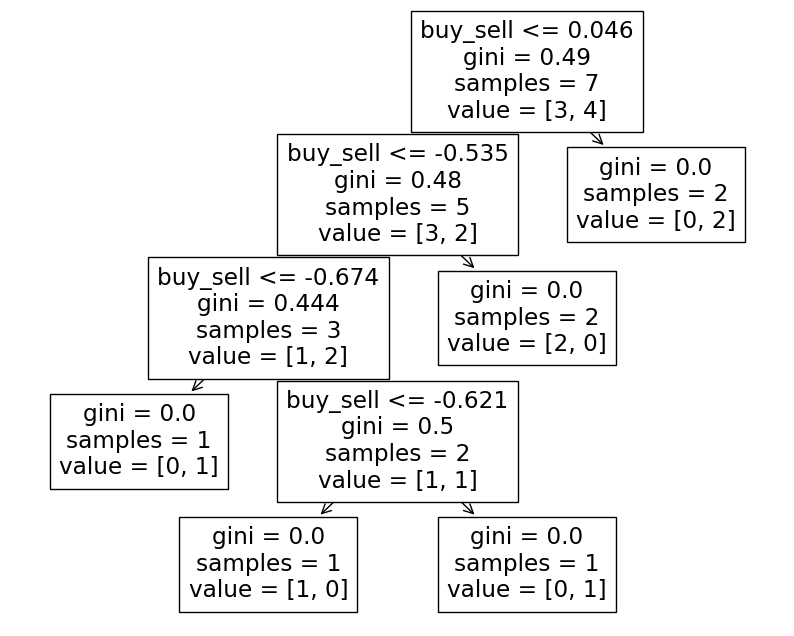

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt

features = ['buy_sell']

# Visualize the decision tree
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(decisiontree, feature_names=features)

# Show the plot
plt.show()

# Random Forest

Accuracy

EA - 50%

In [60]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=5, bootstrap=0, n_estimators=1000)

model=randomforest.fit(X_train_std, y_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f" Accuracy = {accuracy}, Precision = {precision}, F1 Score = {f1}")
#Add to the list
rflist = []
rflist.append(y_test_pred)
y_test_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


 Accuracy = 0.625, Precision = 0.625, F1 Score = 0.7692307692307693


array([1, 1, 1, 1, 1, 1, 1, 1])

# Logistic Regression

Accuracy:

EA - 56.25%

In [61]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model = lr.fit(X_train_std, y_train)

In [62]:
# Calculate the accuracy score
from sklearn import metrics
y_test_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print(f" Accuracy = {accuracy}, Precision = {precision}, F1 Score = {f1}")
#Add to te list
lrlist=[]
lrlist.append(y_test_pred)

 Accuracy = 0.5, Precision = 0.5714285714285714, F1 Score = 0.6666666666666666


# Artificial Neural Network

Accuracy:

EA: 54%

In [63]:
#Finding the parameters to build the best net
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

import numpy
for i in range(2,12):
    model4= MLPClassifier(hidden_layer_sizes=(i),max_iter=1000)
    scores= cross_val_score(estimator= model4, X=X_train_std, y=y_train, cv=2)
    print(i, '-', numpy.average(scores))
    scores

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


2 - 0.5833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


3 - 0.5833333333333333
4 - 0.5833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


5 - 0.5833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


6 - 0.41666666666666663


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


7 - 0.5833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


8 - 0.41666666666666663


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


9 - 0.5833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


10 - 0.41666666666666663
11 - 0.41666666666666663


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

import numpy
for i in range(2,12):
    model4= MLPClassifier(hidden_layer_sizes=(i),max_iter=1000)
    y_train_pred = cross_val_predict(estimator=svc, X=X_train_std, y=y_train, cv=2)
    acc = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("F1 Score:", f1)

Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0
Accuracy: 0.42857142857142855
Precision: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Add to the list

In [65]:
#Add to te list
mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=1000)
model = mlp.fit(X_train_std, y_train)
y_test_pred = model.predict(X_test)

annlist=[]
annlist.append(y_test_pred)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1])

# Analyzing the performance of the models

EA Block

Best model - KNN (k=3)

In [66]:
outcome_df = pd.DataFrame({'Regular': y_test, 'KNN': knn_list[0], 'SVM': svmlist[0], 'Decision_Tree': dtlist[0], 'Random_Forest': rflist[0], 'Logistic': lrlist[0], 'ANN': annlist[0]})
outcome_df

,Regular,KNN,SVM,Decision_Tree,Random_Forest,Logistic,ANN
0,1,-1,1,1,1,1,1
1,1,-1,-1,1,1,-1,1
2,1,-1,1,1,1,1,1
3,-1,1,1,1,1,1,1
4,1,-1,1,1,1,1,1
5,1,-1,1,1,1,1,1
6,-1,-1,1,1,1,1,1
7,-1,-1,1,1,1,1,1


In [67]:
predictions = pd.merge(dataset.iloc[6:].reset_index(), outcome_df, left_index=True, right_index = True)

In [68]:
predictions

,index,Date,Open,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled,sentiment_score,stock_val_change_pred,buy_sell,Regular,KNN,SVM,Decision_Tree,Random_Forest,Logistic,ANN
0,6,2023-06-07,331.650,40717129,323.38,-2.493593,-1.671472,20117.275226,0.409033,1,1,-1,1,1,1,1,1
1,7,2023-06-08,323.935,23277708,325.26,0.409033,0.239551,-3544.594644,0.553863,1,1,-1,-1,1,1,-1,1
2,8,2023-06-09,324.990,22528950,326.79,0.553863,0.334904,14097.981239,0.995191,1,1,-1,1,1,1,1,1
3,9,2023-06-12,328.580,24306753,331.85,0.995191,0.625465,231688.819469,-0.052322,-1,-1,1,1,1,1,1,1
4,10,2023-06-13,334.465,22951279,334.29,-0.052322,-0.064195,5495.468901,0.897290,1,1,-1,1,1,1,1,1
5,11,2023-06-14,334.340,26003791,337.34,0.897290,0.561009,21188.778055,3.146853,1,1,-1,1,1,1,1,1
6,12,2023-06-15,337.480,38899075,348.10,3.146853,2.042070,879.472597,-2.558921,-1,-1,-1,1,1,1,1,1
7,13,2023-06-16,351.320,46551985,342.33,-2.558921,-1.714482,3471.303984,NaN,-1,-1,-1,1,1,1,1,1


Predictions

In [69]:
predictions["Gain_or_Loss_KNN"] = (predictions['Adjusted Close'] - predictions['Open'])*predictions['KNN']
predictions["Gain_or_Loss_SVM"] = (predictions['Adjusted Close'] - predictions['Open'])*predictions['SVM']
predictions["Gain_or_Loss_DecisionTree"] = (predictions['Adjusted Close'] - predictions['Open'])*predictions['Decision_Tree']
predictions["Gain_or_Loss_Random_Forest"] = (predictions['Adjusted Close'] - predictions['Open'])*predictions['Random_Forest']
predictions["Gain_or_Loss_Logistic"] = (predictions['Adjusted Close'] - predictions['Open'])*predictions['Logistic']
predictions["Gain_or_Loss_ANN"] = (predictions['Adjusted Close'] - predictions['Open'])*predictions['ANN']

predictions

,index,Date,Open,Volume,Adjusted Close,stock_val_change,stock_val_change_scaled,sentiment_score,stock_val_change_pred,buy_sell,...,Decision_Tree,Random_Forest,Logistic,ANN,Gain_or_Loss_KNN,Gain_or_Loss_SVM,Gain_or_Loss_DecisionTree,Gain_or_Loss_Random_Forest,Gain_or_Loss_Logistic,Gain_or_Loss_ANN
0,6,2023-06-07,331.650,40717129,323.38,-2.493593,-1.671472,20117.275226,0.409033,1,...,1,1,1,1,8.270,-8.270,-8.270,-8.270,-8.270,-8.270
1,7,2023-06-08,323.935,23277708,325.26,0.409033,0.239551,-3544.594644,0.553863,1,...,1,1,-1,1,-1.325,-1.325,1.325,1.325,-1.325,1.325
2,8,2023-06-09,324.990,22528950,326.79,0.553863,0.334904,14097.981239,0.995191,1,...,1,1,1,1,-1.800,1.800,1.800,1.800,1.800,1.800
3,9,2023-06-12,328.580,24306753,331.85,0.995191,0.625465,231688.819469,-0.052322,-1,...,1,1,1,1,3.270,3.270,3.270,3.270,3.270,3.270
4,10,2023-06-13,334.465,22951279,334.29,-0.052322,-0.064195,5495.468901,0.897290,1,...,1,1,1,1,0.175,-0.175,-0.175,-0.175,-0.175,-0.175
5,11,2023-06-14,334.340,26003791,337.34,0.897290,0.561009,21188.778055,3.146853,1,...,1,1,1,1,-3.000,3.000,3.000,3.000,3.000,3.000
6,12,2023-06-15,337.480,38899075,348.10,3.146853,2.042070,879.472597,-2.558921,-1,...,1,1,1,1,-10.620,10.620,10.620,10.620,10.620,10.620
7,13,2023-06-16,351.320,46551985,342.33,-2.558921,-1.714482,3471.303984,NaN,-1,...,1,1,1,1,8.990,-8.990,-8.990,-8.990,-8.990,-8.990


In [70]:
predictions.to_csv("predictions.csv")

Adjusting the index

In [71]:
first_day_result = predictions.iloc[0]['Adjusted Close']
predictions.at[ 0, 'KNN_Result']= first_day_result
predictions.at[ 0, 'LogReg_Result']= first_day_result
predictions.at[ 0, 'SVM_Result']= first_day_result
predictions.at[ 0, 'Naive_Bayes_Result']= first_day_result
predictions.at[ 0, 'Decision_Tree_Result']= first_day_result
predictions.at[ 0, 'Random_Forest_Result']= first_day_result
predictions.at[ 0, 'ANN_Result']= first_day_result

In [72]:
for i in range(1, len(predictions)):
    predictions.loc[i, 'KNN_Result'] = predictions.loc[i-1, 'KNN_Result'] + predictions.loc[i, 'Gain_or_Loss_KNN']
    predictions.loc[i, 'LogReg_Result'] = predictions.loc[i-1, 'LogReg_Result'] + predictions.loc[i, 'Gain_or_Loss_Logistic']
    predictions.loc[i, 'SVM_Result'] = predictions.loc[i-1, 'SVM_Result'] + predictions.loc[i, 'Gain_or_Loss_SVM']
    predictions.loc[i, 'Decision_Tree_Result'] = predictions.loc[i-1, 'Decision_Tree_Result'] + predictions.loc[i, 'Gain_or_Loss_DecisionTree']
    predictions.loc[i, 'Random_Forest_Result'] = predictions.loc[i-1, 'Random_Forest_Result'] + predictions.loc[i, 'Gain_or_Loss_Random_Forest']
    predictions.loc[i, 'ANN_Result'] = predictions.loc[i-1, 'ANN_Result'] + predictions.loc[i, 'Gain_or_Loss_ANN']

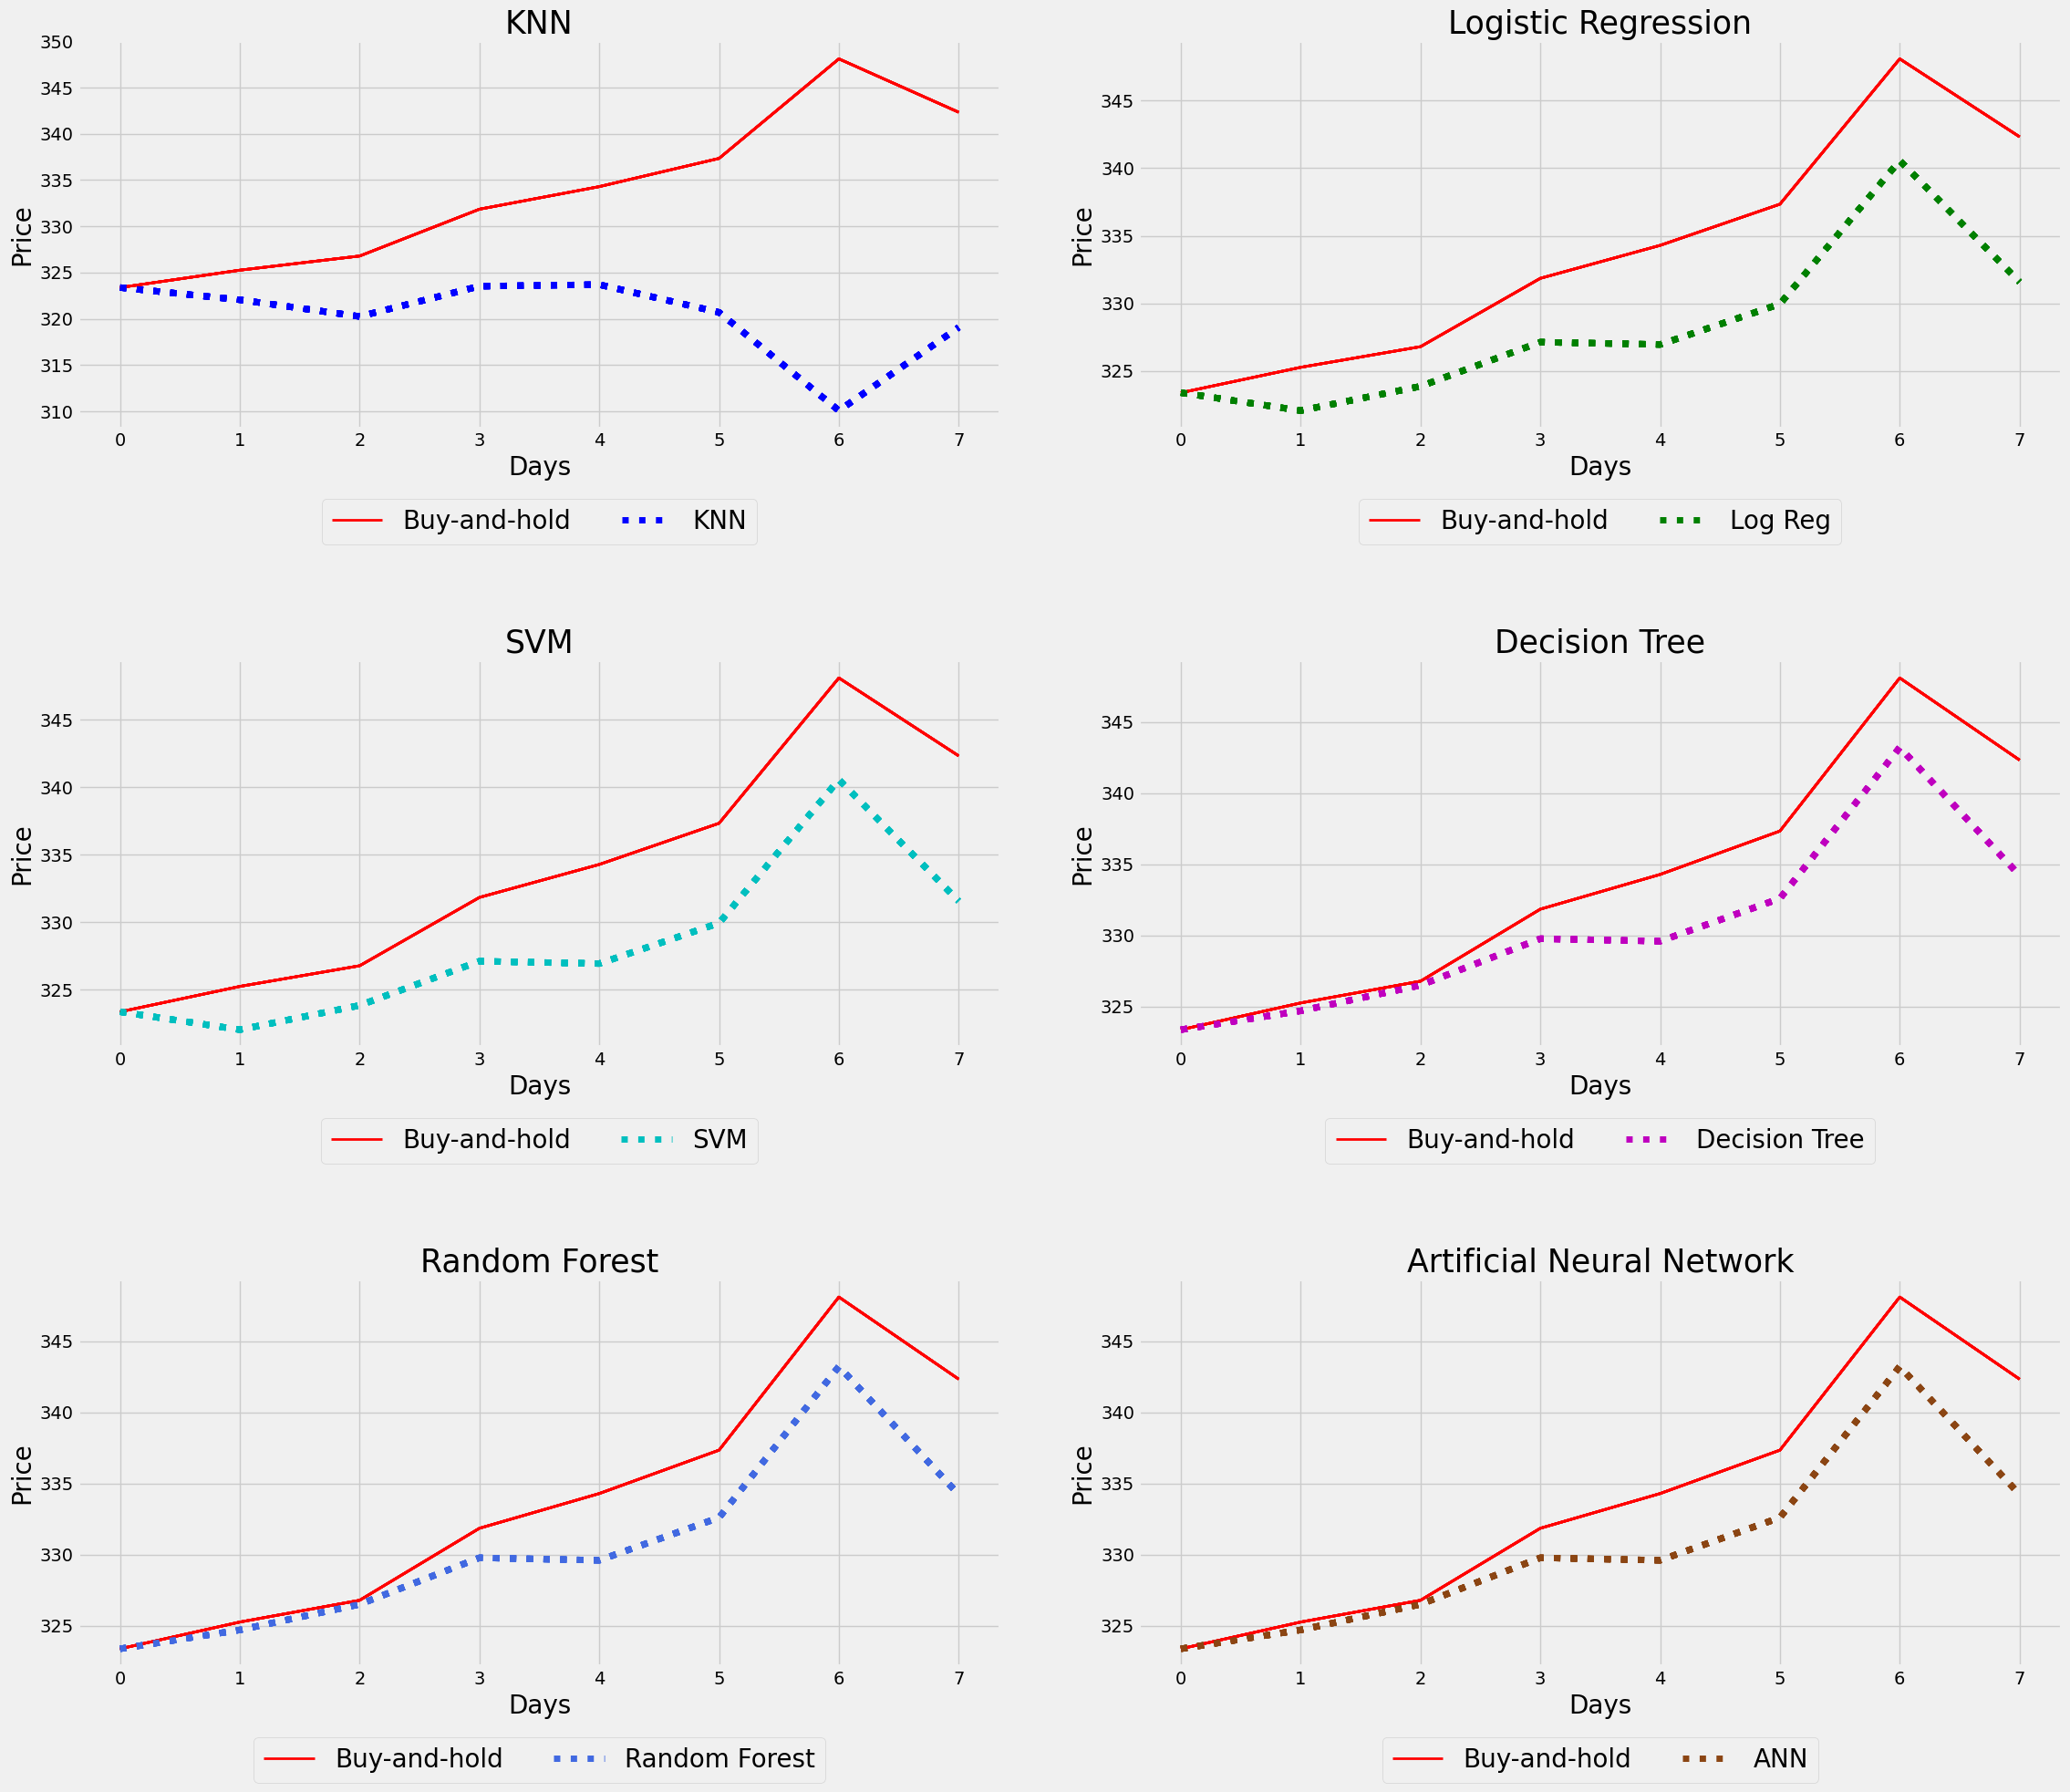

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 25, 22

ax1 = predictions['Adjusted Close']
ax2 = predictions['KNN_Result']
ax3 = predictions['LogReg_Result']
ax4 = predictions['SVM_Result']
ax5 = predictions['Decision_Tree_Result']
ax6 = predictions['Random_Forest_Result']
ax7 = predictions['ANN_Result']

for i in range (1, 7):
    plt.subplots_adjust(hspace=0.6, wspace=0.15)

    plt.subplot(3,2,1)
    plt.plot(ax1, 'r',  linewidth=2)
    plt.plot(ax2,  'b',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('KNN',  fontsize=25)
    a='Buy-and-hold'
    b='KNN'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

    plt.subplot(3,2,2)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax3, 'g',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Logistic Regression', fontsize=25)
    a='Buy-and-hold'
    b='Log Reg'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

    plt.subplot(3,2,3)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax4, 'c',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('SVM', fontsize=25)
    a='Buy-and-hold'
    b='SVM'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

    plt.subplot(3,2,4)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax5, 'm',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Decision Tree', fontsize=25)
    a='Buy-and-hold'
    b='Decision Tree'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

    plt.subplot(3,2,5)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax6, 'royalblue',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Random Forest', fontsize=25)
    a='Buy-and-hold'
    b='Random Forest'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

    plt.subplot(3,2,6)
    plt.plot(ax1, 'r',  linewidth=2 )
    plt.plot(ax7, 'saddlebrown',  linestyle=':', linewidth=5)
    plt.xlabel('Days', fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plt.title('Artificial Neural Network', fontsize=25)
    a='Buy-and-hold'
    b='ANN'
    plt.legend((a,b), fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True)

#pylab.savefig('AAL.jpg') # Saves figure as .jpg-file
plt.show()